In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
dataset = pd.read_csv("../data/gold_price_data.csv")

In [4]:
dataset.head()

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


In [5]:
# Need to convert date with dtype object to datetime
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10787 non-null  object 
 1   Value   10787 non-null  float64
dtypes: float64(1), object(1)
memory usage: 168.7+ KB


In [6]:
# Converting date to datetime and setting it as index
dataset['Date'] = pd.to_datetime(dataset['Date'])
serie_temporal = pd.Series(dataset['Value'])
serie_temporal.index = dataset['Date']

In [7]:
serie_temporal

Date
1970-01-01      35.20
1970-04-01      35.10
1970-07-01      35.40
1970-10-01      36.20
1971-01-01      37.40
               ...   
2020-03-09    1672.50
2020-03-10    1655.70
2020-03-11    1653.75
2020-03-12    1570.70
2020-03-13    1562.80
Name: Value, Length: 10787, dtype: float64

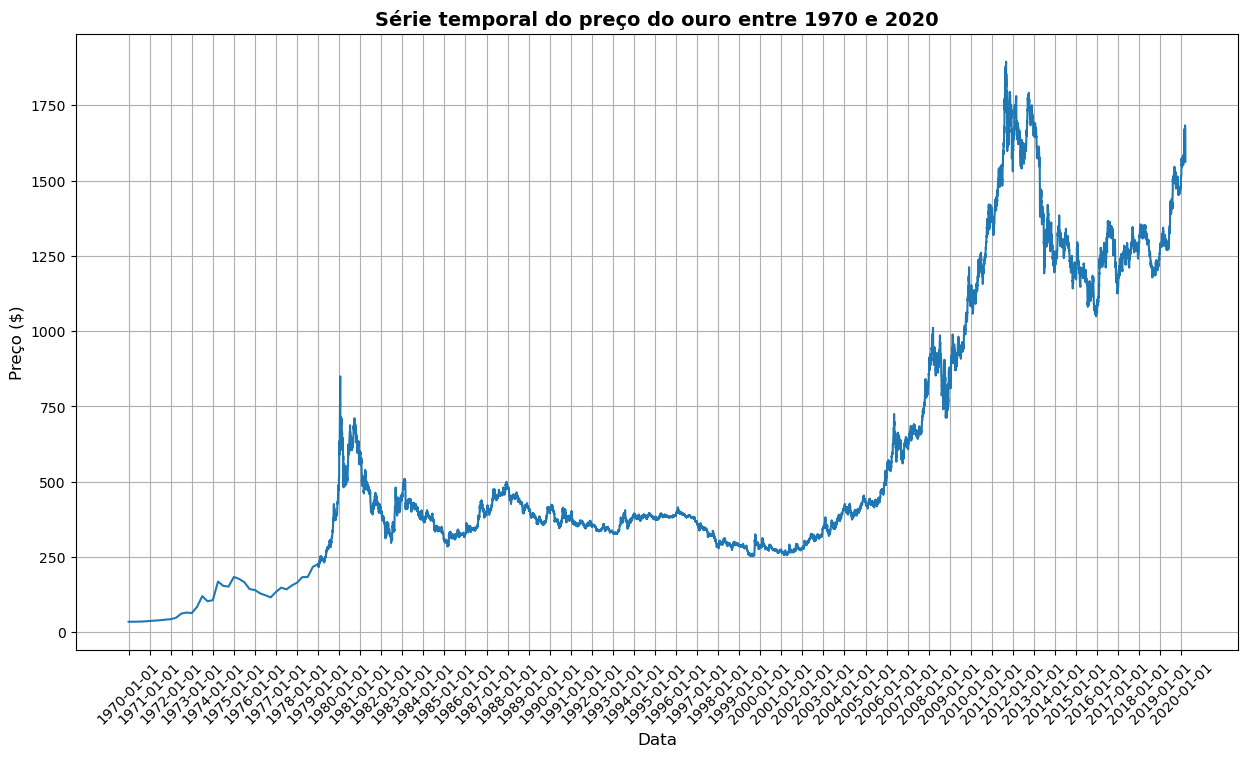

In [8]:
plt.figure(figsize=(15, 8))
plt.plot(serie_temporal)

plt.title('Série temporal do preço do ouro entre 1970 e 2020', fontsize=14, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço ($)', fontsize=12)
plt.xticks(pd.date_range(start=serie_temporal.index.min(), end=serie_temporal.index.max(), freq='YS'), rotation=45)
plt.grid(True)
plt.savefig('../img/gold_price_time_series.png')
plt.show()


In [9]:
# Decomposição da série temporal em tendência, sazonalidade e resíduos
decomposition = sm.tsa.seasonal_decompose(serie_temporal, model='additive', period=365)

# Obtendo as partes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

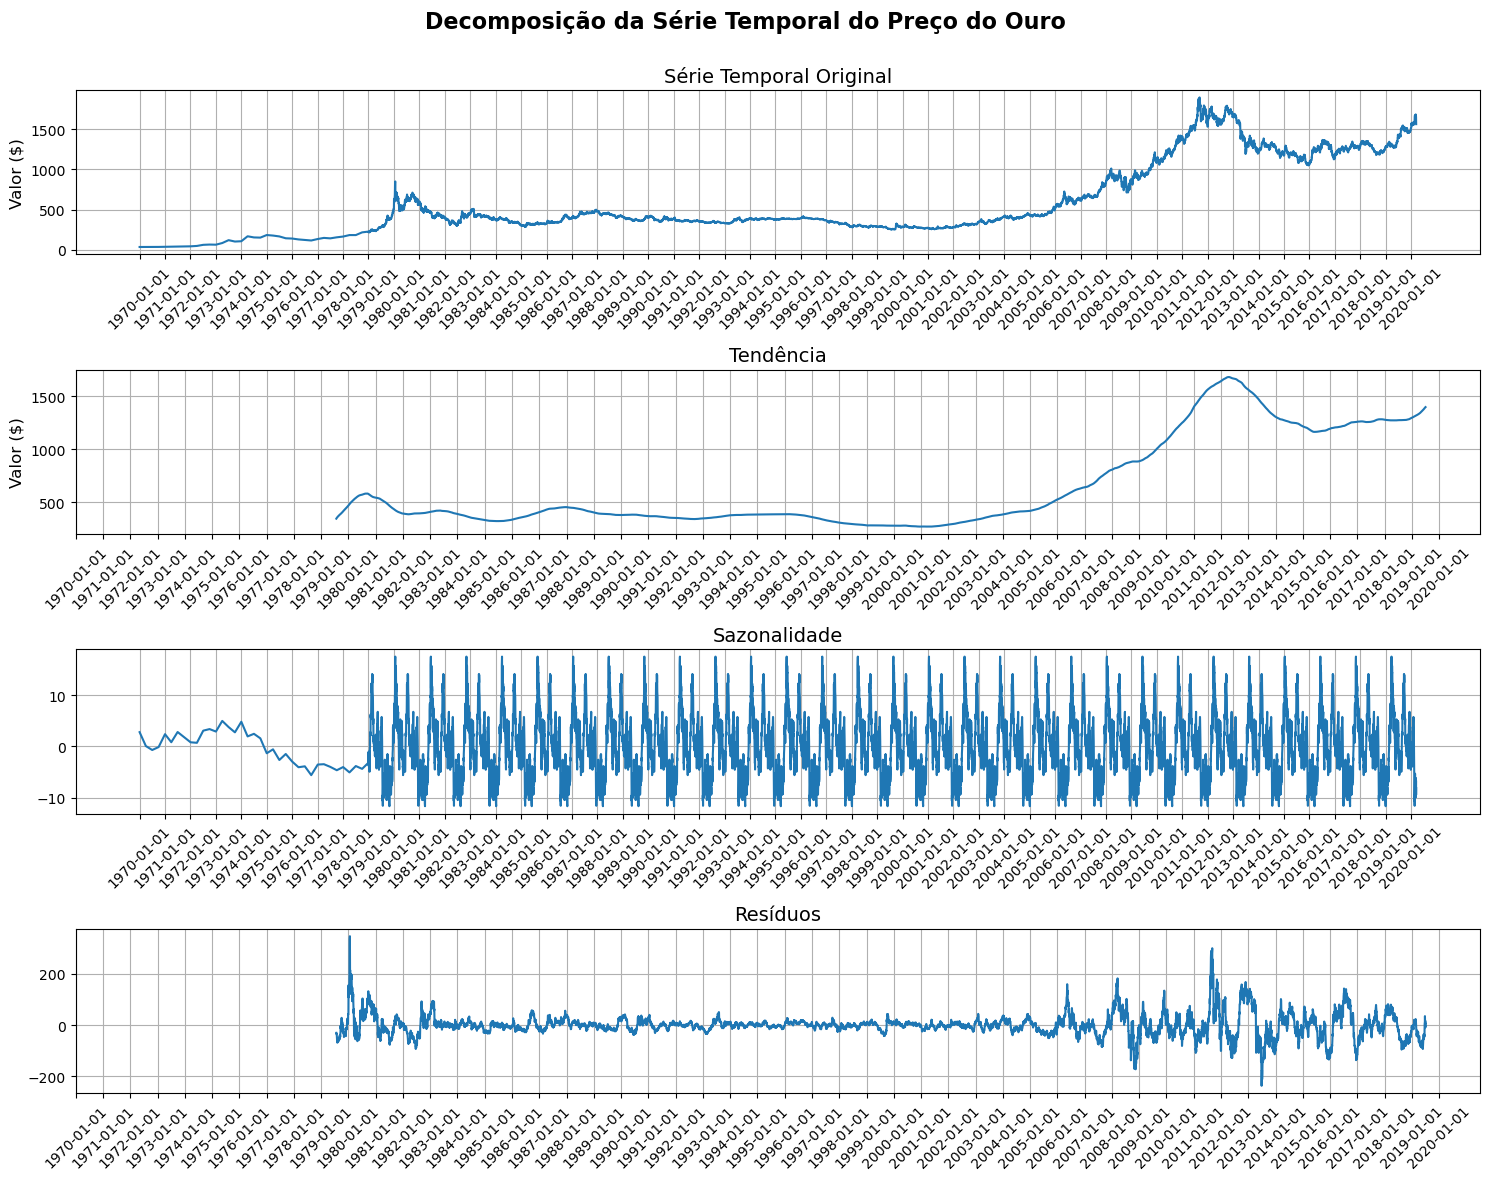

In [10]:
plt.figure(figsize=(15, 12))

# Série Temporal Original
plt.subplot(4, 1, 1)
plt.plot(serie_temporal)
plt.title('Série Temporal Original', fontsize=14)
plt.ylabel('Valor ($)', fontsize=12)
plt.xticks(pd.date_range(start=serie_temporal.index.min(), end=serie_temporal.index.max(), freq='YS'), rotation=45)
plt.grid(True)

# Tendência
plt.subplot(4, 1, 2)
plt.plot(trend)
plt.title('Tendência', fontsize=14)
plt.ylabel('Valor ($)', fontsize=12)
plt.xticks(pd.date_range(start=serie_temporal.index.min(), end=serie_temporal.index.max(), freq='YS'), rotation=45)
plt.grid(True)

# Sazonalidade
plt.subplot(4, 1, 3)
plt.plot(seasonal)
plt.title('Sazonalidade', fontsize=14)
# plt.ylabel('Valor', fontsize=12)
plt.xticks(pd.date_range(start=serie_temporal.index.min(), end=serie_temporal.index.max(), freq='YS'), rotation=45)
plt.grid(True)

# Resíduos
plt.subplot(4, 1, 4)
plt.plot(residual)
plt.title('Resíduos', fontsize=14)
# plt.ylabel('Valor', fontsize=12)
plt.xticks(pd.date_range(start=serie_temporal.index.min(), end=serie_temporal.index.max(), freq='YS'), rotation=45)
plt.grid(True)

# Ajustar o intervalo do eixo x para mostrar todos os anos


# Título maior para a figura
plt.suptitle('Decomposição da Série Temporal do Preço do Ouro\n', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('../img/gold_price_time_series_decomposition.png')
plt.show()